# Avacado Project

### Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

### Content
- This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

- The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

- Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- Type - conventional or organic
- Year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

### Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [1]:
#First we will import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import os

from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

# Let's first begin with Regression model and then will build Classification model

### Loading the Dataset

In [2]:
# Read the dataset

df= pd.read_csv("Avacado.txt")
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# checking the bottom 5 data
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### We can see that our dataset is having 18249 rows and 13 columns

We can see that column "Xlarge Bags" is reflecting value as 0, so we can check if we require this or not.

In [5]:
df['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

- As per above value_counts function we have checked that if all the dataset values are 0 or not, but we can now see that 12048 values are 0 and we have some values other than 0. 

# Exploratory Data Analysis (EDA)

In [6]:
# Checking the dimension of the dataset
df.shape

(18249, 13)

In [7]:
# Checking the types of the dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

- As per above information we can see that our dataset columns have 1 integer datatype, 3 object datatype and 9 float datatype.

- Let's do feature engineering to split Date into Month and Day. 

- Since year column is already been there so no need to separate it.

In [8]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [9]:
# Now again check the types
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [10]:
# Now Seperate date and month
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df.drop("Date",axis=1,inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [11]:
# To check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 2.1+ MB


- Now we can see that our dataset is having 9 float datatypes, 3 integer datatypes, 2 object datatypes.

In [12]:
# Lets check if we have any missing value:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

- We can see that our dataset is having no missing values.

In [13]:
# Checking number of unique values in each column
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [14]:
# Lets check unique values in column 'AveragePrice'
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [15]:
#Lets check unique values in column 'Total Volume'
df['Total Volume'].unique()

array([ 64236.62,  54876.98, 118220.22, ...,  13766.76,  16205.22,
        17489.58])

In [16]:
#Lets check unique values in column '4046'
df['4046'].unique()

array([1036.74,  674.28,  794.7 , ..., 1191.92, 1527.63, 2894.77])

In [17]:
#Lets check unique values in column '4225'
df['4225'].unique()

array([ 54454.85,  44638.81, 109149.67, ...,   2452.79,   2981.04,
         2356.13])

In [18]:
#Lets check unique values in column '4770'
df['4770'].unique()

array([ 48.16,  58.33, 130.5 , ..., 727.94, 727.01, 224.53])

In [19]:
#Lets check unique values in column 'Total Bags'
df['Total Bags'].unique()

array([ 8696.87,  9505.56,  8145.35, ...,  9394.11, 10969.54, 12014.15])

In [20]:
#Lets check unique values in column 'Small Bags'
df['Small Bags'].unique()

array([ 8603.62,  9408.07,  8042.21, ...,  9351.8 , 10919.54, 11988.14])

In [21]:
#Lets check unique values in column 'Large Bags'
df['Large Bags'].unique()

array([ 93.25,  97.49, 103.14, ..., 324.8 ,  42.31,  26.01])

In [22]:
#Lets check unique values in column 'XLarge Bags'
df['XLarge Bags'].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

In [23]:
#Lets check unique values in column 'Type'
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [24]:
#Lets check unique values in column 'year'
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [25]:
#Lets check unique values in column 'region'
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [26]:
#Lets check unique values in column 'Month'
df['Month'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [27]:
#Lets check unique values in column 'Day'
df['Day'].unique()

array([27, 20, 13,  6, 29, 22, 15,  8,  1, 25, 18, 11,  4, 30, 23, 16,  9,
        2, 26, 19, 12,  5, 28, 21, 14,  7, 31, 24, 17, 10,  3],
      dtype=int64)

In [28]:
# Now let us check any duplicate value present in our data
df.drop_duplicates(inplace=True)
df.shape

(18249, 14)

- There is no null value, no missing value, no duplicate values in our dataset

In [29]:
# List of values in the target variable
df["AveragePrice"].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [30]:
# Checking wheather the dataset contains any space
df.loc[df['AveragePrice']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day


In [31]:
# Statistical summary of dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


- As per above observation we can see that there is huge difference between 75% and max for column 'XLarge Bags'

# Data Visualization:

In [32]:
# Now seperating numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


In [33]:
# seprerating categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


### Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


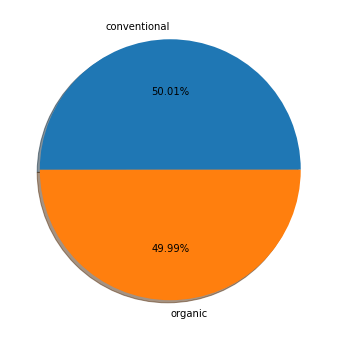

In [34]:
#Visualize the count of 'type'feature of the avocado
print(df["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

- As per above observation, We can see that conventional and organic data is mostly similar.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


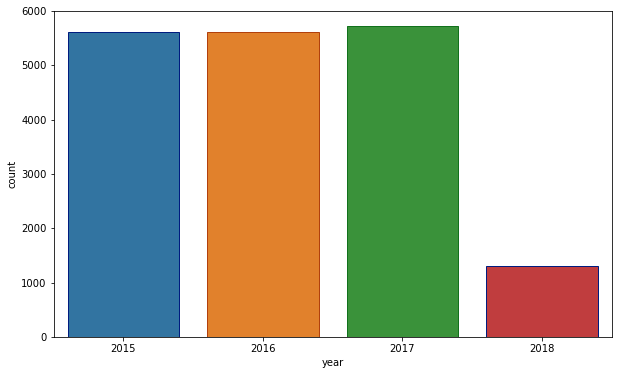

In [35]:
#Visualize the count of year
print(df["year"].value_counts())
plt.figure(figsize=(10,6))

sns.countplot(df["year"],edgecolor=sns.color_palette("dark", 3))
plt.show()

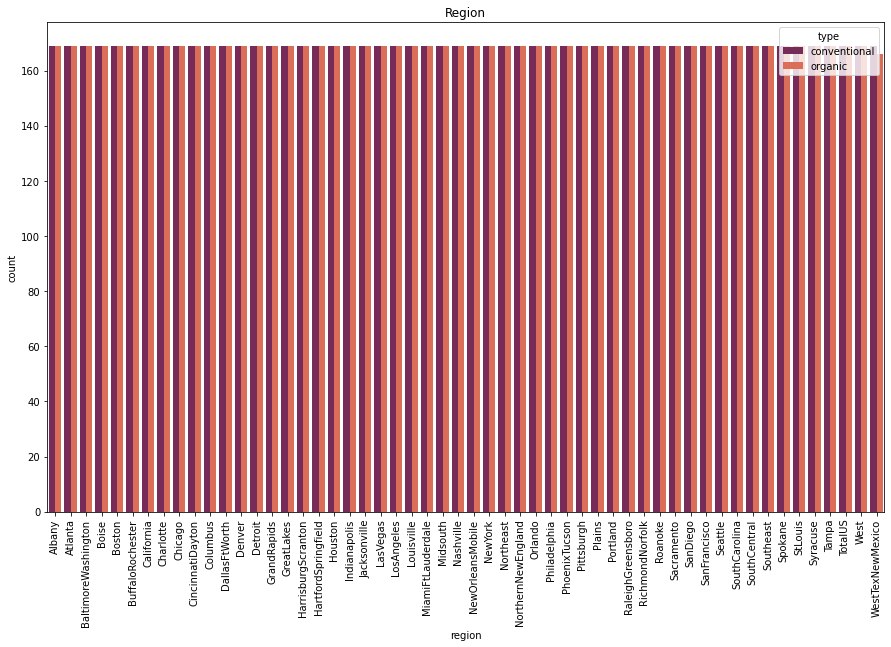

In [36]:
#Visualize the count of Region
plt.figure(figsize=(15,9))
sns.countplot(df["region"],palette="rocket",hue=df['type'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

- Demand of avacado is almost same in every region.

# Visualization of data using Distribution plot

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

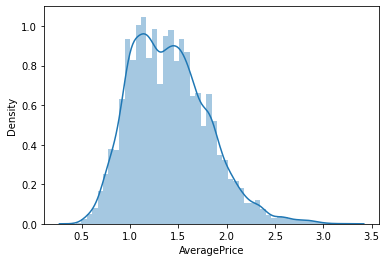

In [37]:
sns.distplot(df['AveragePrice'])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

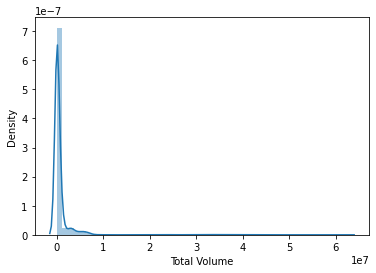

In [38]:
sns.distplot(df['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

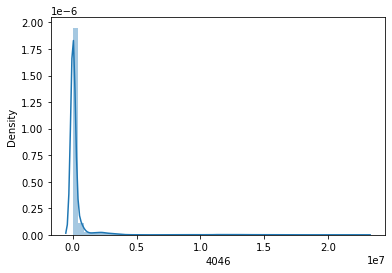

In [39]:
sns.distplot(df['4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

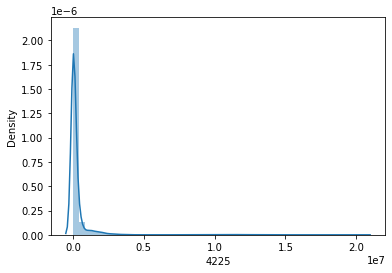

In [40]:
sns.distplot(df['4225'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

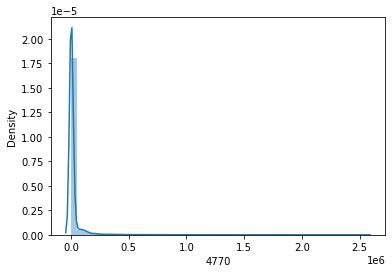

In [41]:
sns.distplot(df['4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

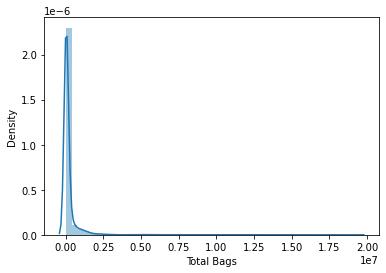

In [42]:
sns.distplot(df['Total Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

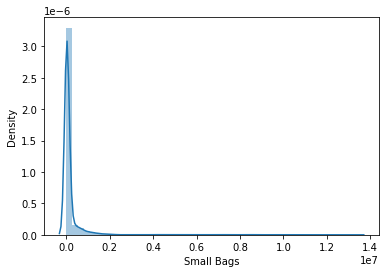

In [43]:
sns.distplot(df['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

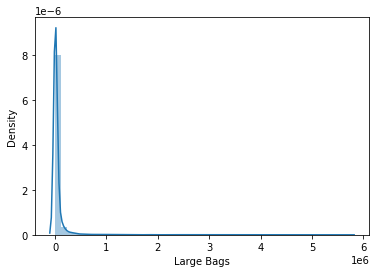

In [44]:
sns.distplot(df['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

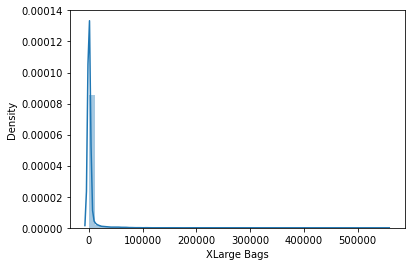

In [45]:
sns.distplot(df['XLarge Bags'])

<AxesSubplot:xlabel='year', ylabel='Density'>

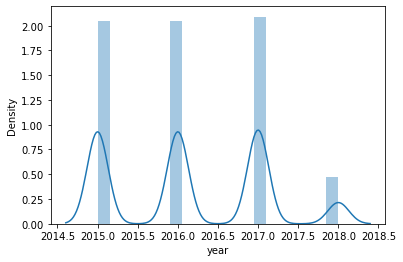

In [46]:
sns.distplot(df['year'])

<AxesSubplot:xlabel='Month', ylabel='Density'>

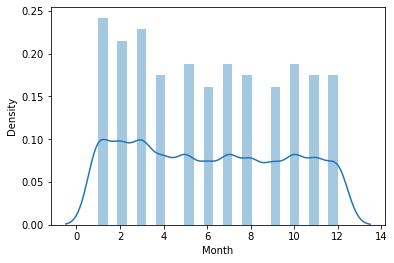

In [47]:
sns.distplot(df['Month'])

<AxesSubplot:xlabel='Day', ylabel='Density'>

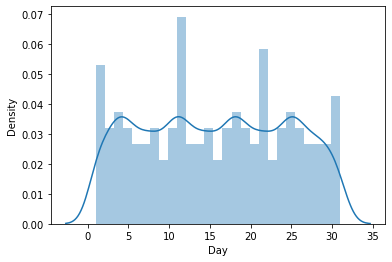

In [48]:
sns.distplot(df['Day'])

# Visualization of data using strip Plot

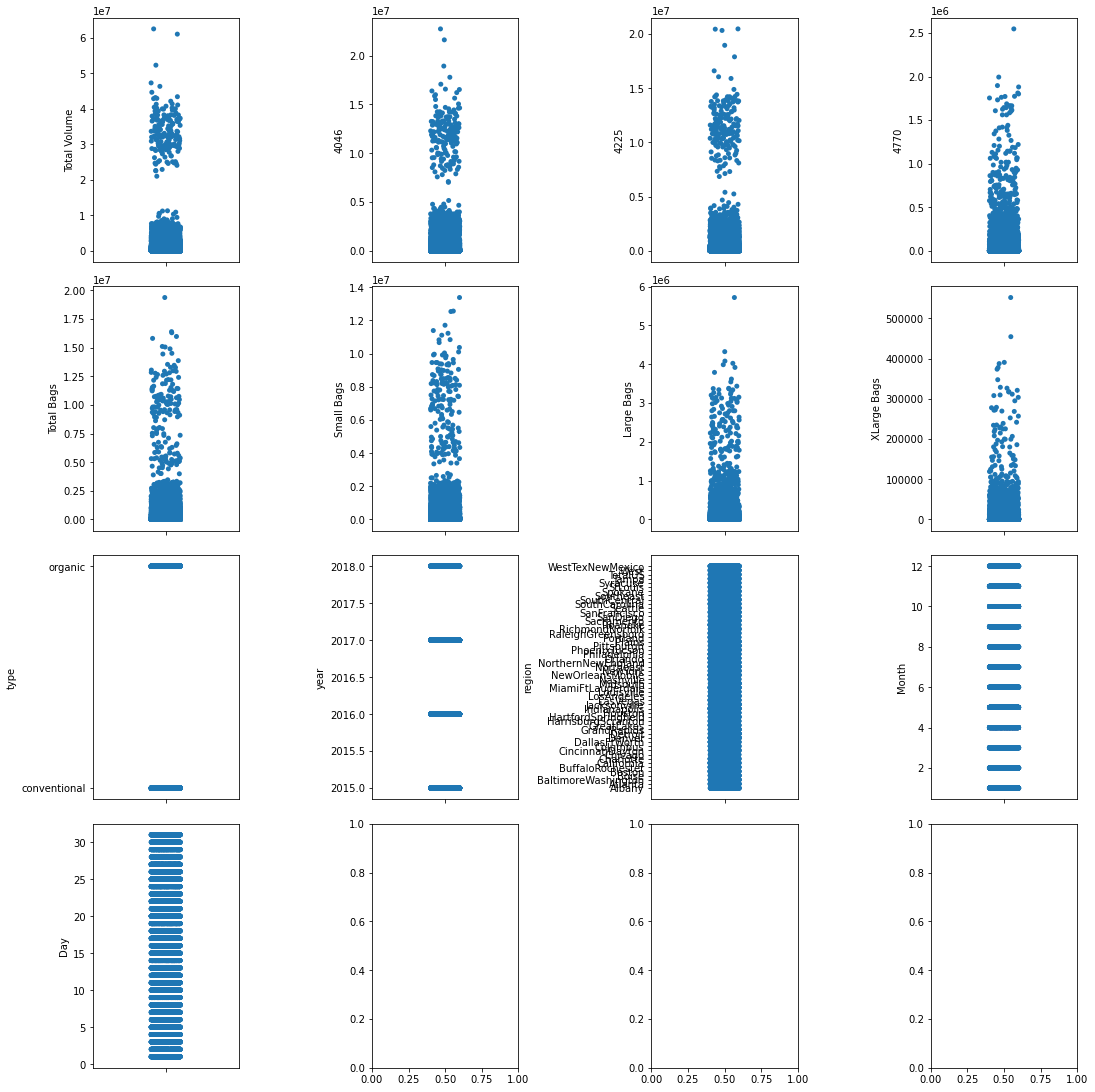

In [49]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.stripplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

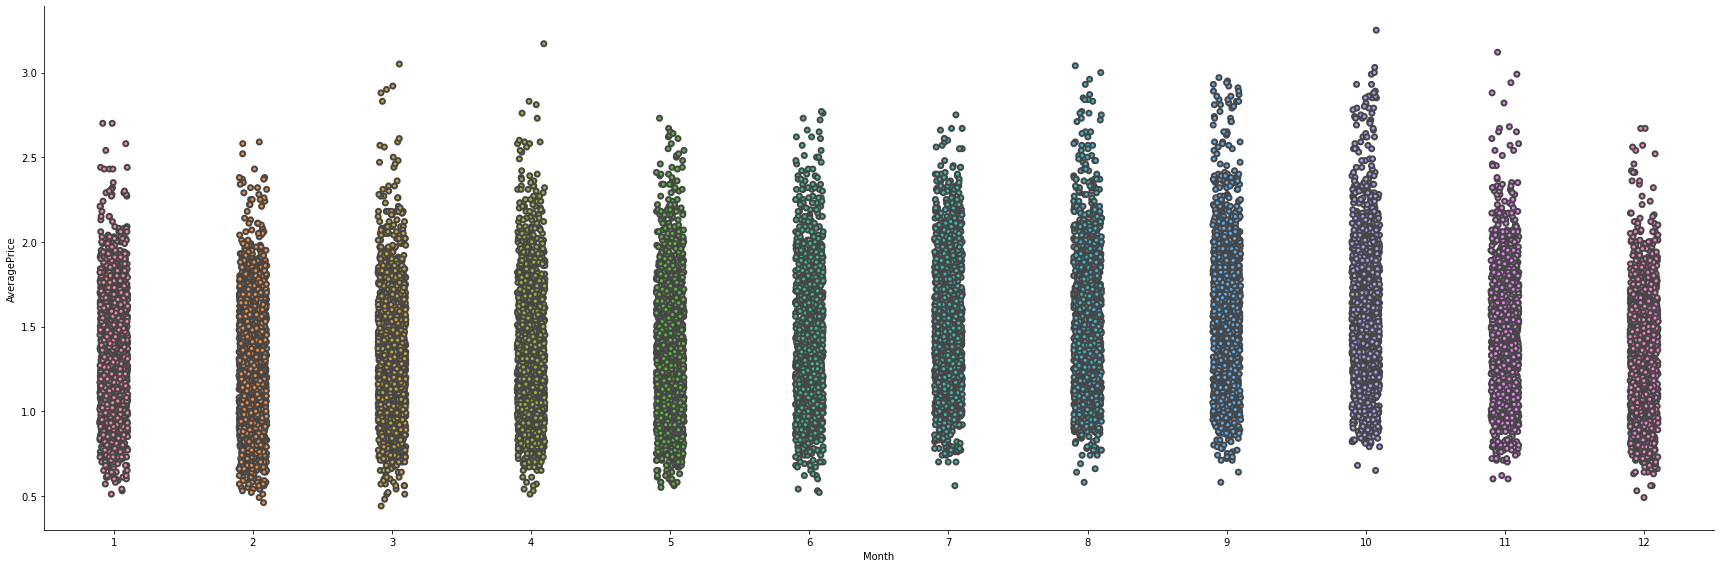

In [50]:
# Relationship between Average Price and Month
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=3)
plt.show()

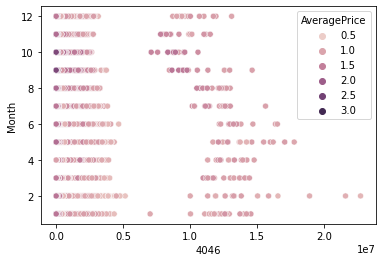

In [51]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4046", y = "Month",hue='AveragePrice',data=df)
plt.show()

- During the period of August to November the average price is high, and during feb, may the sale of 4046 catogory is good, more kilograms are purchased. Usually the customers prefer 0. to 0.5 values of items

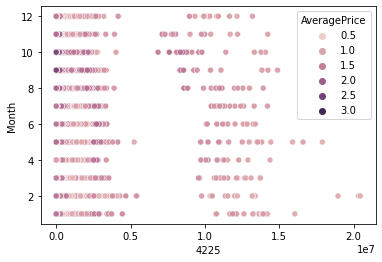

In [52]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4225", y = "Month",hue='AveragePrice',data=df)
plt.show()

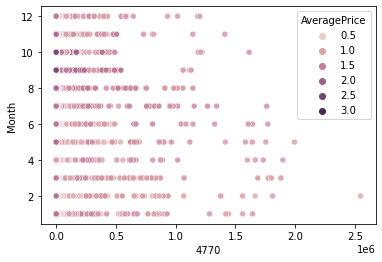

In [53]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4770", y = "Month",hue='AveragePrice',data=df)
plt.show()

# Data Visualization using Bar Plot:

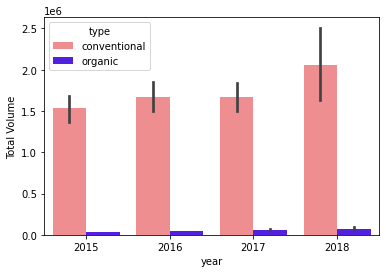

In [54]:
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette="gnuplot2_r")
plt.show()

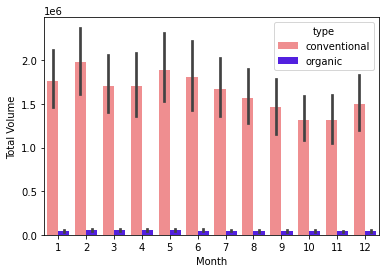

In [55]:
plt.figure(figsize=(6,4))
sns.barplot(x='Month',y='Total Volume',hue="type",data=df,palette="gnuplot2_r")
plt.show()

- Organic avocados are more expensive.
- Let's look at the price of avocado in different regions in different years. Let's start with organic avocados.

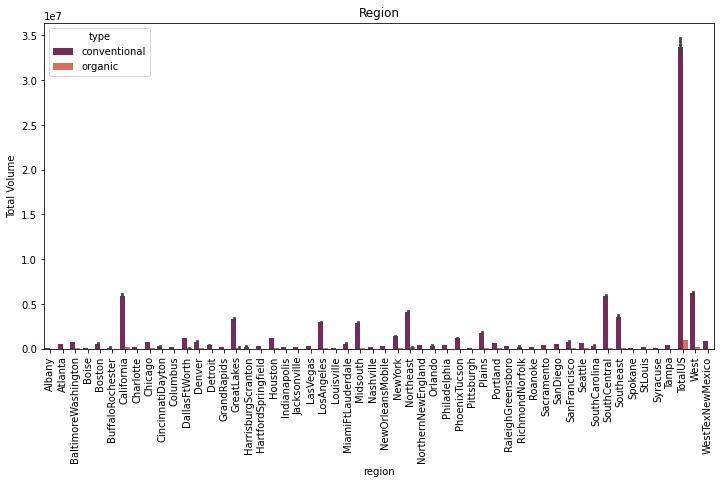

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(df["region"],df['Total Volume'],palette="rocket",hue=df['type'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

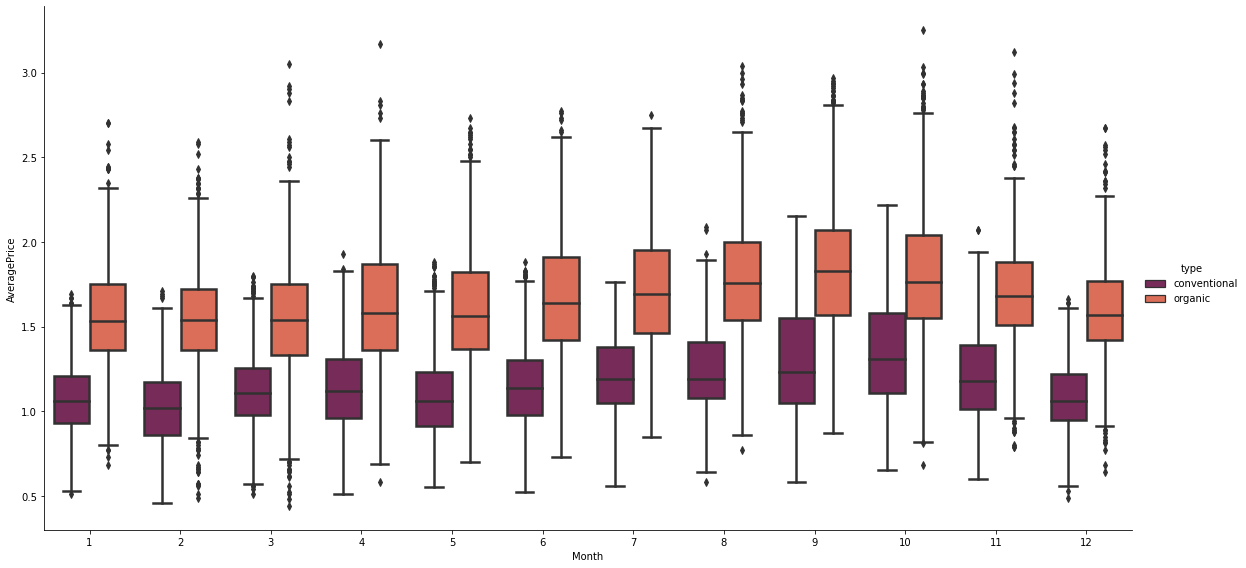

In [57]:
#Relation between month and Average PRice
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8, linewidth=2.5, aspect=2,palette="rocket");

- We can observe that the price of the Organic type avacoda is high compared to coventional, eariler we observed that the demand for conventional is high, it may be because of less price and easy avability

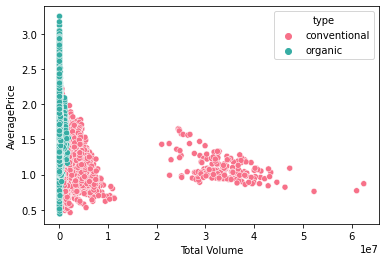

In [58]:
#Relationship between Total volume and Average Price:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=df,palette="husl")
plt.show()

All organic type of avocado is lies in the volume zero and the average price is high for organic. The conventional type avocado has total volume 0-4 with the Average price upto 2.3. Because of low price of conventional the higher volumns were purchase were conventional.

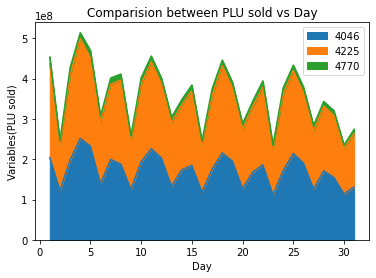

In [59]:
# Comparison between PLU sold vs day:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

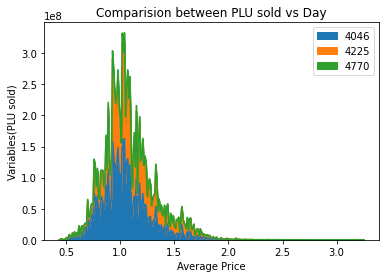

In [60]:
# Type of PLU sold and Average Price
variables = df[['4046', '4225', '4770']].groupby(df.AveragePrice).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Average Price")
plt.ylabel("Variables(PLU sold)")
plt.show()

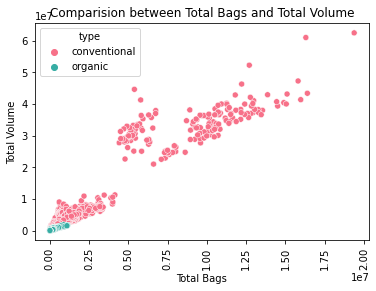

In [61]:
#Comparison between the Total Bags and Total Volume:
plt.figure(figsize=(6,4))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="type",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

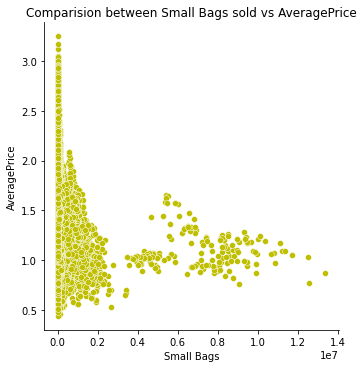

In [62]:
# Comparision between Small Bags sold vs AveragePrice:
sns.relplot(df['Small Bags'],df['AveragePrice'],color="y");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

- Continuous columns have skewness.
- Spike in average price in the year 2017 as the demand was little high in SanFranciso region.
- Price is very high in HartfordSpringfield Region.
- Consumption is very high in West region
- If we think back to the box plot, we can see that Organic cost roughly 34% more than Conventional.
- When looking over their average volume sold, we see that in 2019 Organic Avocados roughly sold 72,000-units, Conventional Avocados sold around 2,000,000-units. Taking these two averages, Organic Avocados sold roughly 186% more than Conventional.
- After cleaning, compiling, and organizing the relevant datasets we can see that Organic Avocados are consistently more expensive than Conventional Avocados. Conversely, we see that Conventional Avocados have a higher average volume sold than Organic.These results pose an inverse relationship between cost and units sold ultimately suggesting that the lower cost leads to higher sales.

# Checking for outliers:

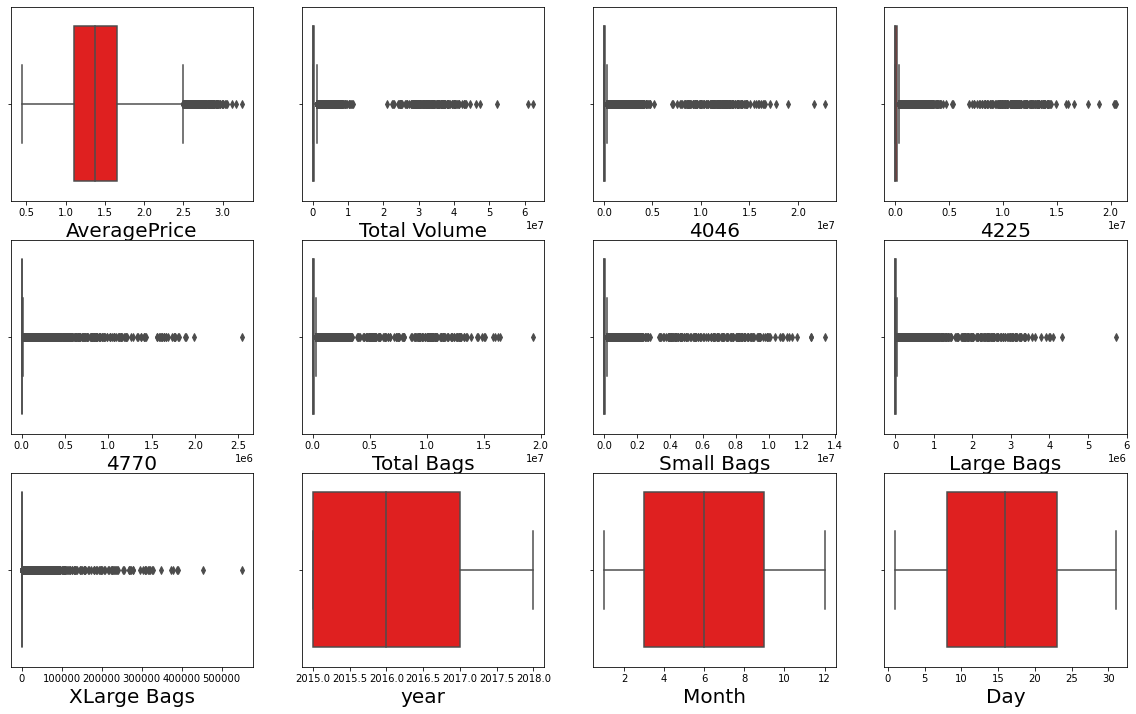

In [63]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Above box plot reflects that there are outliers present in all the columns except Year,Month,Day.
- We will have to remove the outliers using z-score method.
- Even AveragePrice has outliers, as its our target variable we will not remove outliers from it.

# Outlier removal using z-score

In [64]:
# Features containing outliers
feature_cols = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature_cols))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
7,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
8,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
9,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
10,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [65]:
# Creating new dataframe by removing zscore
new_df = df[(z<3).all(axis=1)] 
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [66]:
print('Before removing outliers =',df.shape)
print('After removing outliers =',new_df.shape)
print('Percentage data loss =',((18249-17782)/18249*100))

Before removing outliers = (18249, 14)
After removing outliers = (17782, 14)
Percentage data loss = 2.55904433119623


We have lost 2.55 % of data from our dataset.

# IQR (Inter Quantile Range) method:

In [67]:
# 1st quantile
Q1=feature_cols.quantile(0.25)

# 3rd quantile
Q3=feature_cols.quantile(0.75)

# IQR
IQR=Q3 - Q1
new_df2=df[~((df <(Q1-1.5 * IQR))|(df >(Q3 + 1.5 * IQR))).any(axis=1)]
new_df2.shape

(11747, 14)

In [68]:
# %of data loss
(18249-11747)/18249*100

35.62934955340019

- About 35.62% of data is lost, so we cannot use this method , So we will proceed with zscore method

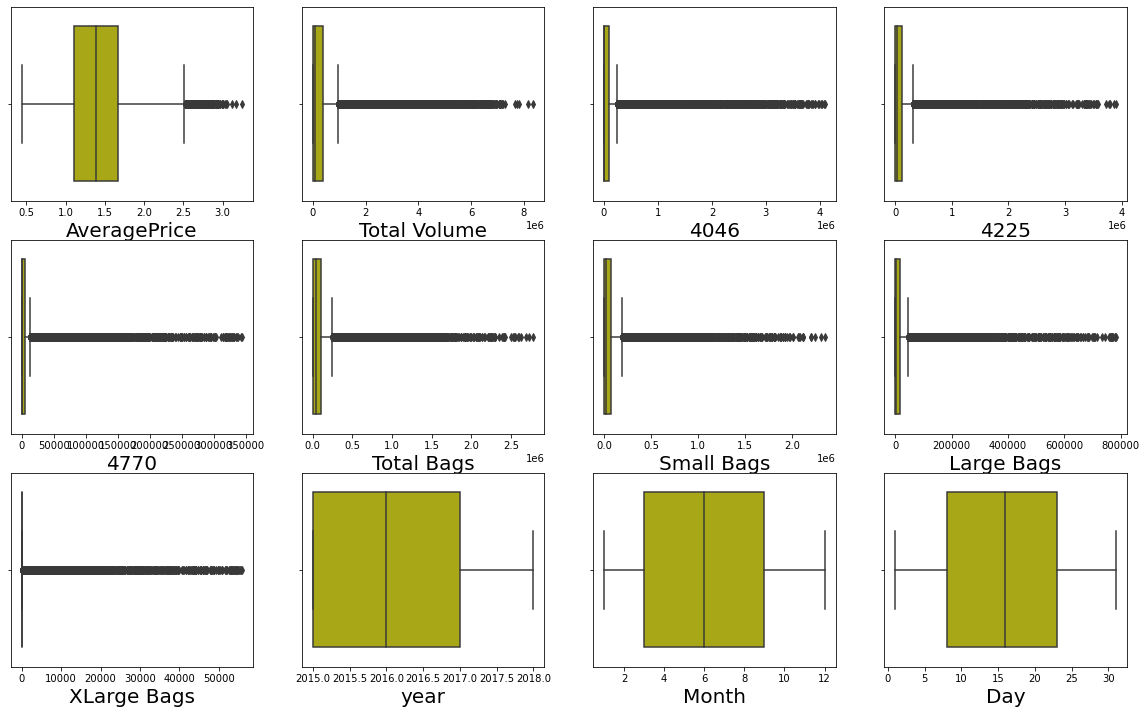

In [69]:
# again plotting to check the status of outlier amount:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- The amount of outliers are reduced, now we will proceed remove skewness

# Checking and removing Skewness:

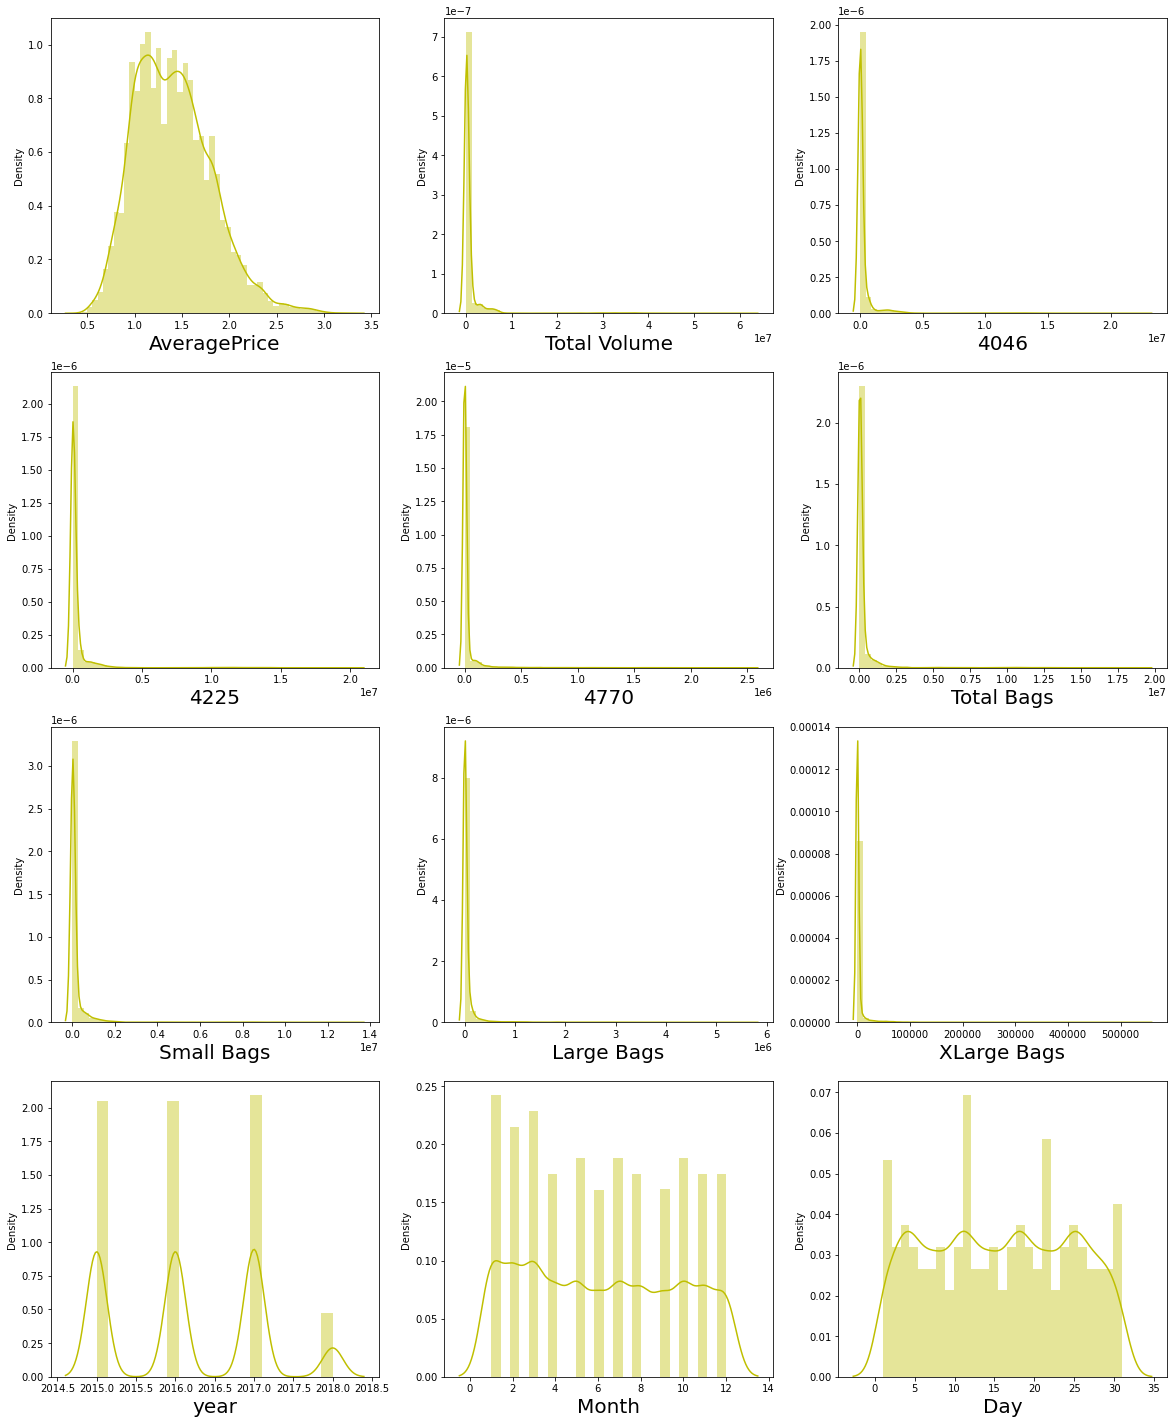

In [70]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can notice skewness in almost all columns except year, month and Day.

In [71]:
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [72]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
from sklearn.preprocessing import PowerTransformer
sk = PowerTransformer(method='yeo-johnson')
new_df[features] = sk.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [73]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Almost all the skewness is removed but still Xlarge Bags have some skewness, let us check with graph and try to remove it.

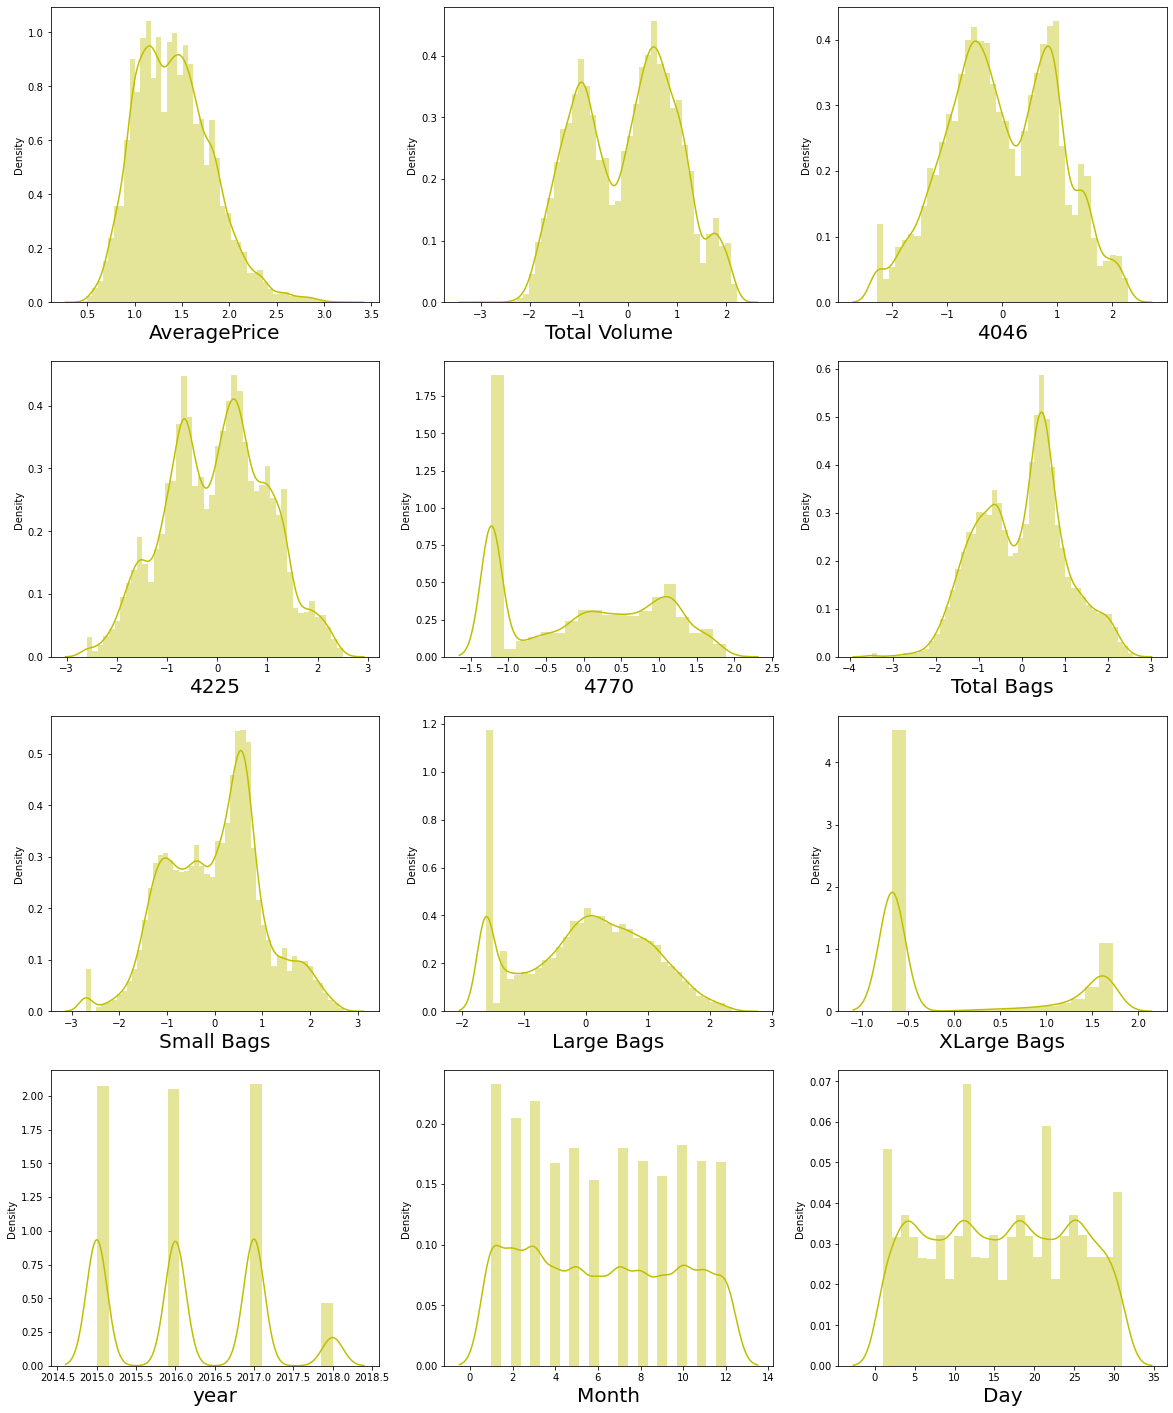

In [74]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

so above graph shows that there is skewness in Xlarge column . we will try to remove it using log1 method.

In [75]:
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [76]:
# let us try one more time for removal
f1=["XLarge Bags"]
new_df[f1] = sk.fit_transform(new_df[f1].values)
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.765164
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

so, finally , we removed skewness from our dataset.

# Encoding:

In [77]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7,1,53
8,1,53
9,1,53
10,1,53


# Correlation using HEAT map:

In [78]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.393528,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.627310,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.573589,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.580290,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.615107,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.609370,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.597809,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.449473,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.393528,0.627310,0.573589,0.580290,0.615107,0.609370,0.597809,0.449473,1.000000,-0.673864,0.153607,-0.015786,0.022063,0.011528
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.673864,1.000000,0.007399,0.021970,-0.005044,-0.002469


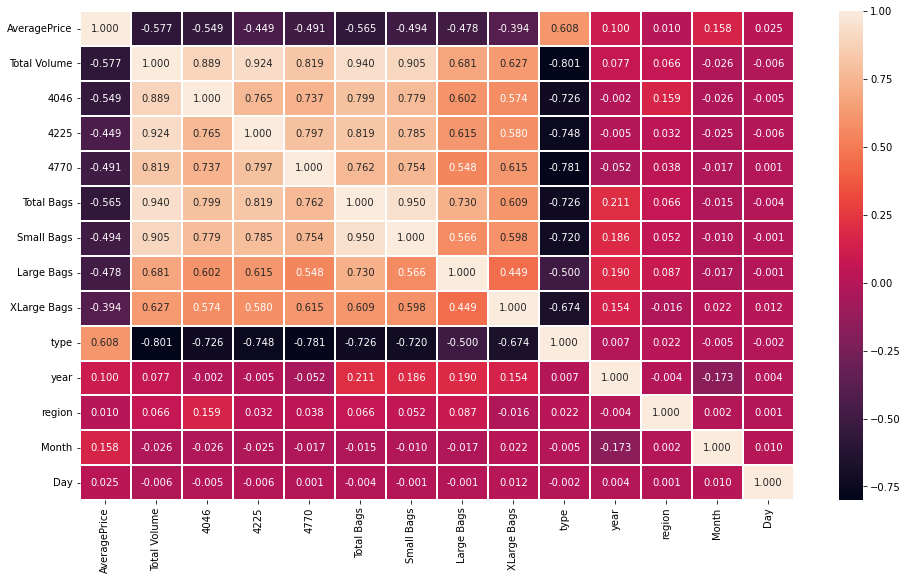

In [79]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0);

Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target.

The features Day and region have no relation with the target so we can drop these columns.

Almost all the features are correlated with each other which leads to multicollinearity problem. 

We will solve this problem by VIF value.

Also most of the columns have no relation with each other and have zero correlation.

In [80]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.393528
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

# Visualizing the correlation between label and features using bar plot

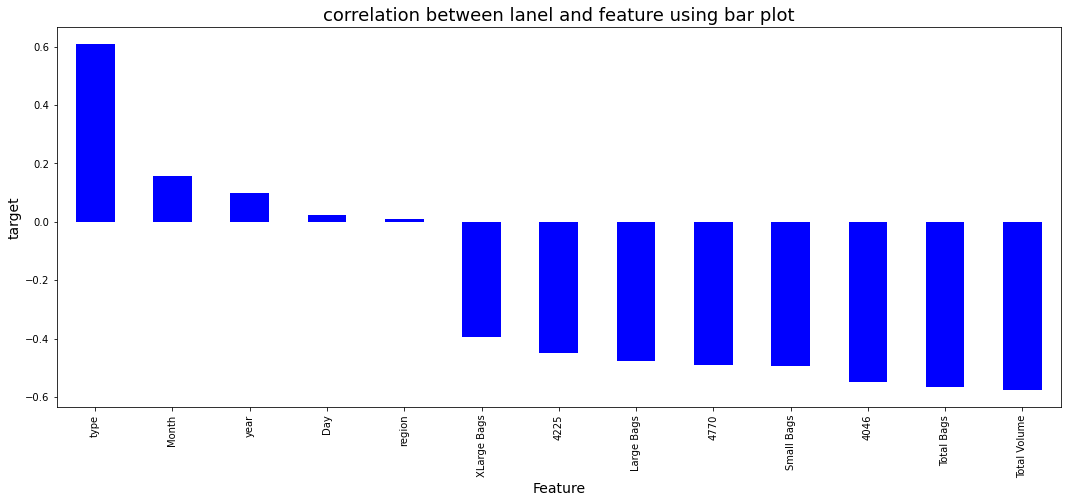

In [81]:
plt.figure(figsize=(18,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

### The features region and Day have very less correlation with the target so we can drop these columns.

In [82]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.689355,0,2015,0,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.689355,0,2015,0,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.689355,0,2015,0,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.689355,0,2015,0,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.689355,0,2015,0,11,29


In [83]:
# Saving the data for classification
class_df=new_df
class_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.689355,0,2015,0,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.689355,0,2015,0,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.689355,0,2015,0,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.689355,0,2015,0,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.689355,0,2015,0,11,29


In [84]:
# Dropping irrelevant columns
new_df.drop("region",axis=1, inplace=True)
new_df.drop("XLarge Bags",axis=1, inplace=True)

In [85]:
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,0,2015,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,0,2015,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,0,2015,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,0,2015,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,1,2018,2,4
8,1.71,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,1,2018,1,28
9,1.87,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,1,2018,1,21
10,1.93,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,1,2018,1,14


# Separating the features and label variables into x and y:

In [86]:
x = new_df.drop("AveragePrice", axis=1)
y = new_df["AveragePrice"]

# Standard Scalarization Method

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month,Day
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.026443,-1.214908,1.641434,1.289235
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.026443,-1.214908,1.641434,0.491750
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.026443,-1.214908,1.641434,-0.305734
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.026443,-1.214908,1.641434,-1.103219
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.026443,-1.214908,1.358706,1.517088
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,0.974238,1.979143,-1.185845,-1.331072
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,0.974238,1.979143,-1.468572,1.403161
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,0.974238,1.979143,-1.468572,0.605677
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,0.974238,1.979143,-1.468572,-0.191808


# Checking VIF values for multicollinearity:

In [88]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,51.519431,Total Volume
1,6.752126,4046
2,11.107325,4225
3,3.890095,4770
4,34.408868,Total Bags
5,16.622534,Small Bags
6,3.460516,Large Bags
7,3.320393,type
8,1.332874,year
9,1.048738,Month


In [89]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [90]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,36.655341,Total Volume
1,6.032782,4046
2,9.932006,4225
3,3.886417,4770
4,7.643315,Small Bags
5,2.102990,Large Bags
6,3.283398,type
7,1.305229,year
8,1.046372,Month
9,1.000594,Day


now VIF is less than 10 , so we move further

# Building a model:

In [91]:
# Finding best random state
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8010386317475304  on Random_state  49


We got maximum R2 score 80.10% on the basis of Random state 49.

In [92]:
#Creating new train test split at best randoem state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [93]:
#Regression Algorithms
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

# RANDOM FOREST REGRESSOR

In [94]:
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.8657554396642666
MAE: 0.10359373945641985
MSE: 0.02214154111340206
RMSE: 0.14880033976238785
Cross_Validaton_Score 0.21754592182417953


### Support Vector Machine Regressor

In [95]:
# Checking R2 score for Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)

# prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',mean_absolute_error(y_test, predsvr))
print('MSE:',mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.7698854556589798
MAE: 0.14193809914214917
MSE: 0.03795379590484803
RMSE: 0.19481733984645214
Cross_Validaton_Score 0.18605815975802625


# Linear Regression

In [96]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',mean_absolute_error(y_test, predLR))
print('MSE:',mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.5470411520986231
MAE: 0.21089548137234337
MSE: 0.07470847927398652
RMSE: 0.2733285189547306
Cross_Validaton_Score 0.20217204304746322


# Gradient Descent Regressor:

In [97]:
# Checking R2 score for Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',mean_absolute_error(y_test, predSGD))
print('MSE:',mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predSGD)))

# Checking cv score for Stochastic Gradient Descent Regressor
print("Cross_Validaton_Score",cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.5429034603950738
MAE: 0.21185268641364696
MSE: 0.07539092682150426
RMSE: 0.27457408257427407
Cross_Validaton_Score 0.19785964730821515


# KNN Regressor

In [98]:
# Checking R2 score for KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.8010386317475304
MAE: 0.13058144329896906
MSE: 0.032815566635426424
RMSE: 0.18115067384756378
Cross_Validaton_Score 0.12260919939063734


# GradientBoosting Regressor:

In [99]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.7144793234474924
MAE: 0.162971437159996
MSE: 0.04709217105559663
RMSE: 0.2170073064567104
Cross_Validaton_Score 0.3475510683532045


- From the difference between R2 score and Cross Validation Score, we can conclude that KNeighbors Regressor will be our best fitting model.

# Hyperparameter Tuning:

In [100]:
from sklearn.model_selection import GridSearchCV
#KNeighbors Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [101]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [102]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}

In [103]:
avocado_model =KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avocado_model.fit(x_train, y_train)
pred = avocado_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred_RFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.14880033976238785
R2_Score: 80.44624045546817


# Saving the model

In [104]:
# Saving the model using .pkl
import joblib
joblib.dump(avocado_model,"Avocado_price.pkl")

['Avocado_price.pkl']

# Predicting the saved model:

In [105]:
# Let's load the saved model and get the prediction

model=joblib.load("Avocado_price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1.21706048, 1.6864147 , 1.83119111, ..., 1.70415885, 1.57562641,
       1.05154902])

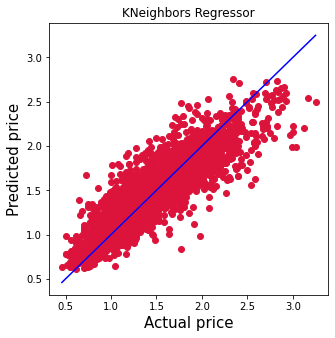

In [106]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.show()

In [107]:
a=np.array(y_test)
result=pd.DataFrame({'Original':a,'Predicted':prediction},index=range(len(a)))
result

,Original,Predicted
0,1.19,1.217060
1,1.88,1.686415
2,1.82,1.831191
3,1.04,0.974715
4,1.10,1.330230
...,...,...
5330,1.66,1.709897
5331,0.70,0.755105
5332,1.54,1.704159
5333,1.60,1.575626


# Classification Problem- Finding the Region from these data

In [108]:
# Read the dataset

data= pd.read_csv("Avacado.txt")
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [109]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [110]:
data["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [111]:
data.shape

(18249, 13)

In [112]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [113]:
class_df = data

# Encoding the categorical columns using Label Encoding

In [114]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
class_df[categorical_col]= class_df[categorical_col].apply(LE.fit_transform)
class_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7,1,53
8,1,53
9,1,53
10,1,53


# Correlation

In [115]:
class_df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


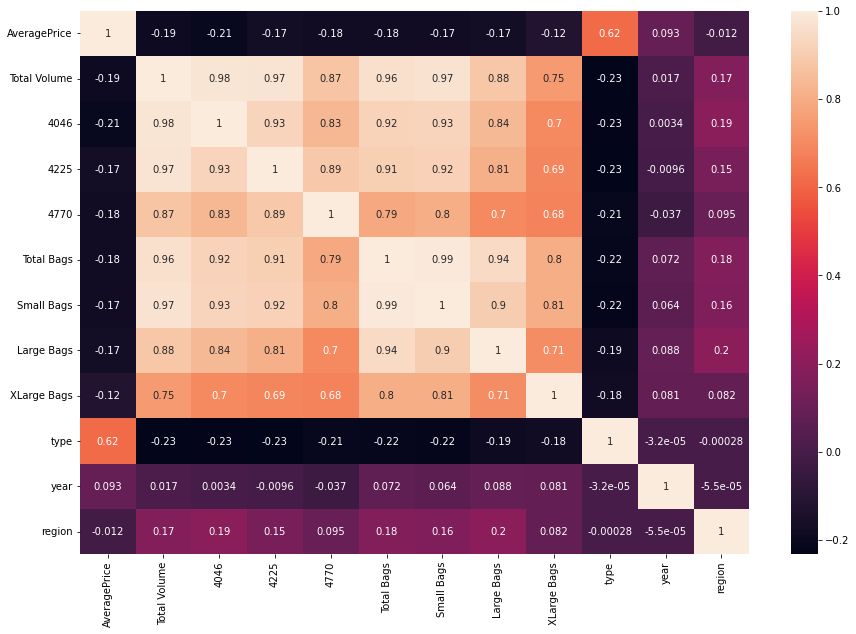

In [116]:
plt.figure(figsize=(15,10))
sns.heatmap(class_df.corr(),annot=True)
cor=class_df.corr()

In [117]:
#let us find the correlation with targetvariable
cor['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
year           -0.000055
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64

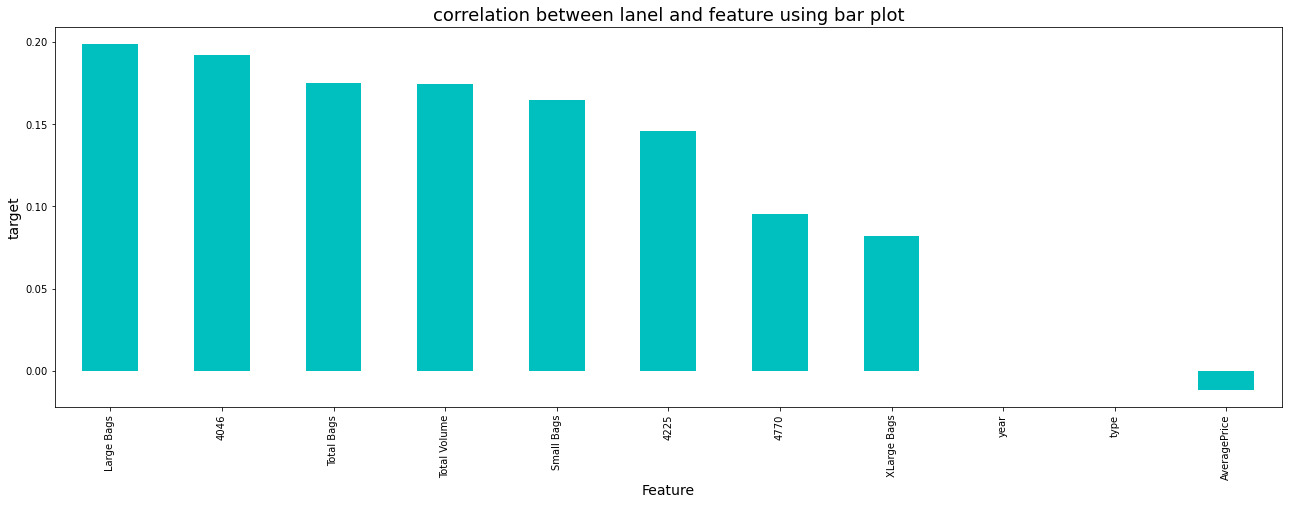

In [118]:
plt.figure(figsize=(22,7))
class_df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [119]:
# Dropping irrelevant columns
class_df.drop("Date",axis=1, inplace=True)
class_df.drop("year",axis=1, inplace=True)

In [120]:
x = class_df.drop("region", axis=1)
y = class_df["region"]
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1


In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [122]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.661340e+00,AveragePrice
1,4.913646e+09,Total Volume
2,6.592397e+08,4046
3,5.973256e+08,4225
4,4.757811e+06,4770
5,2.370316e+14,Total Bags
6,1.364727e+14,Small Bags
7,1.448103e+13,Large Bags
8,7.620497e+10,XLarge Bags
9,1.670469e+00,type


In [123]:
x.drop('Total Volume',inplace=True,axis=1)

In [124]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.661302e+00,AveragePrice
1,1.006404e+01,4046
2,1.347342e+01,4225
3,5.369666e+00,4770
4,2.370316e+14,Total Bags
5,1.364727e+14,Small Bags
6,1.448103e+13,Large Bags
7,7.620497e+10,XLarge Bags
8,1.668284e+00,type


In [125]:
x.drop('Total Bags',axis=True,inplace=True)
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.661301,AveragePrice
1,10.061224,4046
2,13.471588,4225
3,5.369650,4770
4,19.342369,Small Bags
5,5.541205,Large Bags
6,3.413255,XLarge Bags
7,1.668221,type


In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7985388127853881  on Random_state  51


In [127]:
#spliting the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=51)

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [129]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7842922374429224
[[81  0  0 ...  0  0  0]
 [ 0 78  0 ...  0  0  0]
 [ 0  0 92 ...  0  0  1]
 ...
 [ 0  0  0 ... 95  0  0]
 [ 0  0  0 ...  0 95  0]
 [ 0  4  3 ...  0  0 59]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       104
           1       0.68      0.80      0.74        97
           2       0.88      0.84      0.86       110
           3       0.72      0.79      0.75        94
           4       0.79      0.89      0.83        97
           5       0.76      0.76      0.76       110
           6       0.89      0.97      0.93        99
           7       0.84      0.82      0.83       112
           8       0.95      0.89      0.92       114
           9       0.84      0.81      0.82       109
          10       0.67      0.57      0.62       103
          11       0.82      0.89      0.85        91
          12       0.80      0.85      0.82        93
          13       0.76      0.73      0.74        96
          14  

# Random Forest Classifier

In [130]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8968036529680365
[[ 93   0   0 ...   0   0   0]
 [  0  91   0 ...   0   0   0]
 [  0   0 108 ...   0   0   0]
 ...
 [  0   0   0 ...  97   0   0]
 [  0   0   0 ...   1 104   0]
 [  0   1   2 ...   0   0  67]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       104
           1       0.81      0.94      0.87        97
           2       0.94      0.98      0.96       110
           3       0.80      0.87      0.84        94
           4       0.92      0.94      0.93        97
           5       0.85      0.87      0.86       110
           6       0.95      1.00      0.98        99
           7       0.95      0.93      0.94       112
           8       0.98      0.94      0.96       114
           9       0.92      0.87      0.90       109
          10       0.89      0.84      0.87       103
          11       0.83      0.97      0.89        91
          12       0.96      0.99      0.97        93
          13       0.88      0.8

# Logistic Regression

In [131]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.31689497716894977
[[35  0  0 ...  0  0  0]
 [ 3 21  0 ...  0  0  0]
 [ 2  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 92  1  0]
 [ 0  0  0 ...  3 73  0]
 [ 2  0  0 ...  0  0 19]]
              precision    recall  f1-score   support

           0       0.14      0.34      0.19       104
           1       0.60      0.22      0.32        97
           2       0.69      0.31      0.43       110
           3       0.10      0.32      0.16        94
           4       0.31      0.26      0.28        97
           5       0.50      0.11      0.18       110
           6       0.56      0.71      0.62        99
           7       0.52      0.12      0.20       112
           8       0.89      0.49      0.63       114
           9       0.36      0.45      0.40       109
          10       0.32      0.12      0.17       103
          11       0.16      0.51      0.24        91
          12       0.45      0.44      0.45        93
          13       0.62      0.32      0.42        96
          14 

# Support Vector Machine

In [132]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.25680365296803653
[[ 3  0  0 ...  0  0  0]
 [ 2 14  0 ...  0  0  5]
 [ 1  0 36 ...  0  0  0]
 ...
 [ 0  0  0 ... 86  2  0]
 [ 0  0  0 ...  0 69  0]
 [ 4  4  0 ...  0  0 37]]
              precision    recall  f1-score   support

           0       0.03      0.03      0.03       104
           1       0.38      0.14      0.21        97
           2       0.71      0.33      0.45       110
           3       0.00      0.00      0.00        94
           4       0.36      0.10      0.16        97
           5       0.13      0.20      0.16       110
           6       0.98      0.57      0.72        99
           7       0.00      0.00      0.00       112
           8       1.00      0.49      0.66       114
           9       0.78      0.19      0.31       109
          10       0.24      0.10      0.14       103
          11       0.40      0.37      0.38        91
          12       0.85      0.43      0.57        93
          13       0.72      0.27      0.39        96
          14 

# k nearest Neighbours

In [133]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.5011872146118721
[[66  0  0 ...  0  0  0]
 [ 0 51  1 ...  0  0  0]
 [ 0  3 68 ...  0  0  0]
 ...
 [ 0  0  0 ... 96  0  0]
 [ 0  0  0 ...  0 90  0]
 [ 4  7  2 ...  0  0 35]]
              precision    recall  f1-score   support

           0       0.32      0.63      0.42       104
           1       0.25      0.53      0.34        97
           2       0.46      0.62      0.53       110
           3       0.25      0.50      0.33        94
           4       0.37      0.52      0.43        97
           5       0.35      0.39      0.37       110
           6       0.85      0.80      0.82        99
           7       0.44      0.46      0.45       112
           8       0.82      0.66      0.73       114
           9       0.44      0.52      0.48       109
          10       0.22      0.26      0.24       103
          11       0.48      0.64      0.55        91
          12       0.54      0.61      0.58        93
          13       0.42      0.41      0.41        96
          14  

# cross validation score

In [134]:
from sklearn.model_selection import cross_val_score
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.5601867278331086
0.6879720996932919
0.26707439456109194
0.2314012996617576
0.3434057144573293


# HYPERPARAMETER TUNING

In [135]:
from sklearn.model_selection import GridSearchCV
# Random forest classifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}

In [136]:
GCV=GridSearchCV(rfc,parameters,cv=5)
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'max_features': 'sqrt', 'n_estimators': 120}


In [137]:
region_model = RandomForestClassifier(max_features='auto',n_estimators=150 )
region_model.fit(x_train, y_train)
pred = region_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.7351598173516


### By using the GridSeachCV, we are able to find the best param and then find the best accuracy score that is 89% using random forest classifier.

# SAVE THE MODEL

In [138]:
# Saving the model using .pkl
import joblib
joblib.dump(region_model,"Avacado_region.pkl")

['Avacado_region.pkl']

# PREDICTION ON SAVED MODEL

In [139]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avacado_region.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([18, 11, 40, ..., 10, 33, 15])

# ROC- AUC curve:

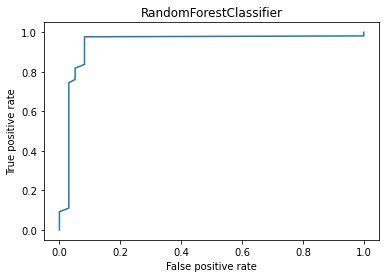

In [140]:
tpr,fpr,thresholds = roc_curve(y_test,prediction,pos_label=True)
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [141]:
a=np.array(y_test)
result=pd.DataFrame({"Original":a,"Predicted":prediction})
result

,Original,Predicted
0,18,18
1,11,11
2,40,40
3,27,27
4,19,19
...,...,...
5470,45,45
5471,15,15
5472,10,10
5473,33,33


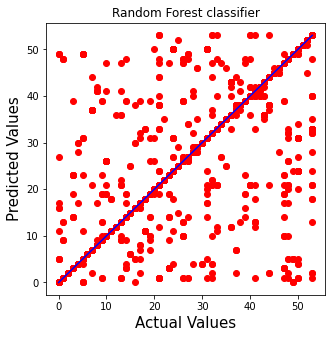

In [142]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest classifier")
plt.show()

### Conclusion:

- The score value of R2 is greater than the accuracy score.

- The average price, the total exchanges and the total volume are well distributed among all the other columns

- There are no outliers in the dataset after replacing it with the mean value.

- Year is the most negatively correlated column of all columns

- Between August and October the price of avocado is much higher compared to other months.

- Hartford Springfield, San Francisco and New York are having more average price as compared to another region

- As organic type of avocado is having the more price per unit then conventional

- Done prediction using region and price but using price the prediction score is high as compared to region

- So in this data set we are using both regression and classification technique for making this model